<a href="https://colab.research.google.com/github/bharaniakella/100xdl/blob/main/regression_with_varying_slopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np

In [18]:
def createAndTrain(x,y):
  annReg=nn.Sequential(
      nn.Linear(1,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )

  lr=0.05
  loss_fun=nn.MSELoss()
  optimizer=torch.optim.SGD(annReg.parameters(),lr=lr)

  num_epochs=500
  losses=torch.zeros(num_epochs)

  for epochi in range(num_epochs):
    yhat=annReg(x)
    loss=loss_fun(yhat,y)
    losses[epochi]=loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions=annReg(x)

  return losses,predictions


In [19]:
def create_data(m):
  N=30
  x=torch.randn(N,1)
  y=m*x + torch.randn(N,1)
  return x,y

In [20]:
x,y=create_data(0.8)
losses,predictions=createAndTrain(x,y)

In [21]:
slopes=np.linspace(-2,2,21)
nexp=50
results=np.zeros((len(slopes),nexp,2))

for slopei in range(len(slopes)):
  for expi in range(nexp):
    x,y=create_data(slopes[slopei])
    losses,predictions=createAndTrain(x,y)
    results[slopei,expi,0]=losses[-1]
    results[slopei,expi,1]=np.corrcoef(y.T,predictions.T.detach())[0,1]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [22]:
results[np.isnan(results)]=0

In [24]:
results

array([[[6.95463991, 0.        ],
        [0.82283539, 0.9062325 ],
        [1.57153213, 0.83311457],
        ...,
        [5.19097185, 0.        ],
        [0.82695478, 0.9150151 ],
        [0.96827495, 0.91404339]],

       [[0.88959867, 0.86855085],
        [0.8706612 , 0.90742641],
        [0.87507802, 0.88691269],
        ...,
        [2.9846952 , 0.        ],
        [1.61964369, 0.77726332],
        [3.1536212 , 0.        ]],

       [[1.72406423, 0.73256906],
        [0.79260415, 0.82055147],
        [0.75956815, 0.87693392],
        ...,
        [0.75689155, 0.88764119],
        [1.02002454, 0.85778853],
        [2.70902562, 0.        ]],

       ...,

       [[0.92319036, 0.8860003 ],
        [2.85439134, 0.        ],
        [0.4728308 , 0.91945642],
        ...,
        [1.19040465, 0.76619453],
        [1.28362906, 0.74563506],
        [0.464147  , 0.90792983]],

       [[1.07137287, 0.88090357],
        [0.73939031, 0.83752954],
        [0.93130457, 0.87059336],
        .

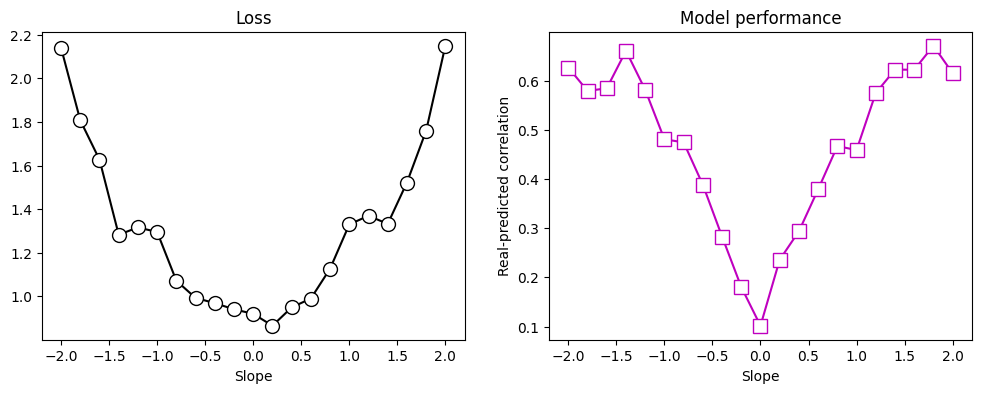

In [25]:
# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()